# Load Data

In [35]:
import pandas as pd

# Loading the dataset
file_path = '/Users/ymadigital/Downloads/Hotels Booking Data - Cleaned Version/hotel_booking_data_cleaned.csv'
hotel_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
hotel_data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


**hotel:** Type of hotel (Resort Hotel, etc.).

**is_canceled:** Indicates if the booking was canceled.

**lead_time:** Number of days between booking and arrival.

**arrival_date_year, arrival_date_month, arrival_date_day_of_month:** Date of arrival.

**stays_in_weekend_nights, stays_in_week_nights:** Duration of stay.

**adults, children, babies:** Number of guests.

**meal:** Type of meal booked.

**country:** Country of origin of the guest.

**deposit_type:** Type of deposit made.

**customer_type:** Type of customer.

**adr:** Average Daily Rate.

**total_of_special_requests:** Total number of special requests made by the customer.

**reservation_status:** Status of the reservation.

**reservation_status_date:** Date when the reservation status was last updated.

# Table of Content

### Business Problem and Assumptions

Problem: How can we optimize hotel bookings to maximize revenue and improve customer satisfaction?

### Assumptions:

Cancellation rates impact revenue and operational efficiency.

Customer preferences and booking patterns vary by demographic and time of year.

Special requests are indicators of customer satisfaction.

### Research Questions and Hypotheses

Question: What factors are most predictive of cancellations?

Hypothesis: Lead time and deposit type are strong predictors of cancellations.

Question: How do customer demographics affect booking patterns?

Hypothesis: Customers from different countries have distinct booking behaviors.

Question: Is there a relationship between special requests and customer satisfaction?

Hypothesis: More special requests correlate with higher customer satisfaction.


# Data cleaning and preprocessing phase

In [36]:
# Assessing missing values and data types
missing_values = hotel_data.isnull().sum()
data_types = hotel_data.dtypes

missing_values_report = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})
missing_values_report[missing_values_report['Missing Values'] > 0]


,Missing Values,Data Type
children,4,float64
country,488,object
agent,16340,float64
company,112593,float64


**Handling Missing Values**

**Children:** Given the small number of missing values, we can replace them with the mode (most frequent value).

**Country:** Missing values could be replaced with a placeholder like 'Unknown'.

**Agent and Company:** These columns have a significant number of missing values. We need to decide whether to fill them with a placeholder, replace them with a statistical measure (like mode), or drop the columns if they are not crucial for our analysis.

In [37]:
# Dropping 'agent' and 'company' columns
hotel_data.drop(['agent', 'company'], axis=1, inplace=True)

# Dropping rows where 'country' is null
hotel_data.dropna(subset=['country'], inplace=True)

# Checking the new shape of the dataset and remaining columns
new_shape_post_dropping = hotel_data.shape
remaining_columns = hotel_data.columns.tolist()
new_shape_post_dropping

(118902, 30)

In [38]:
remaining_columns


['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [39]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,03/07/2015


## Analysis to address the research questions and hypotheses we outlined earlier


**Factors Predictive of Cancellations:** Investigate which factors most strongly predict whether a booking will be canceled.

**Impact of Customer Demographics on Booking Patterns:** Analyze how customer demographics, like country of origin, influence booking patterns.

**Relationship Between Special Requests and Customer Satisfaction:** Explore the connection between the number of special requests and indicators of customer satisfaction.

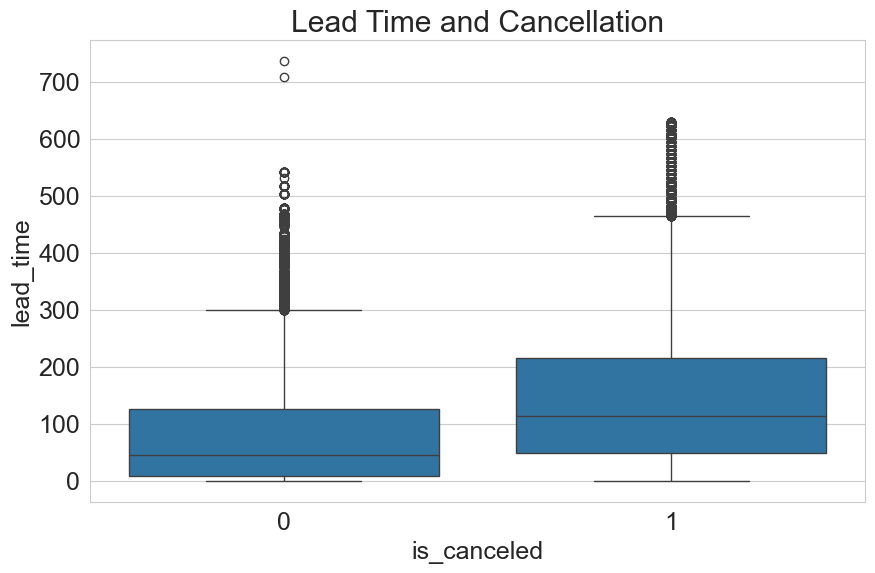

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Analyzing factors predictive of cancellations
# We will use a series of plots to understand how different factors relate to cancellation

# 1. Lead Time vs Cancellation
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=hotel_data)
plt.title('Lead Time and Cancellation')
plt.show()

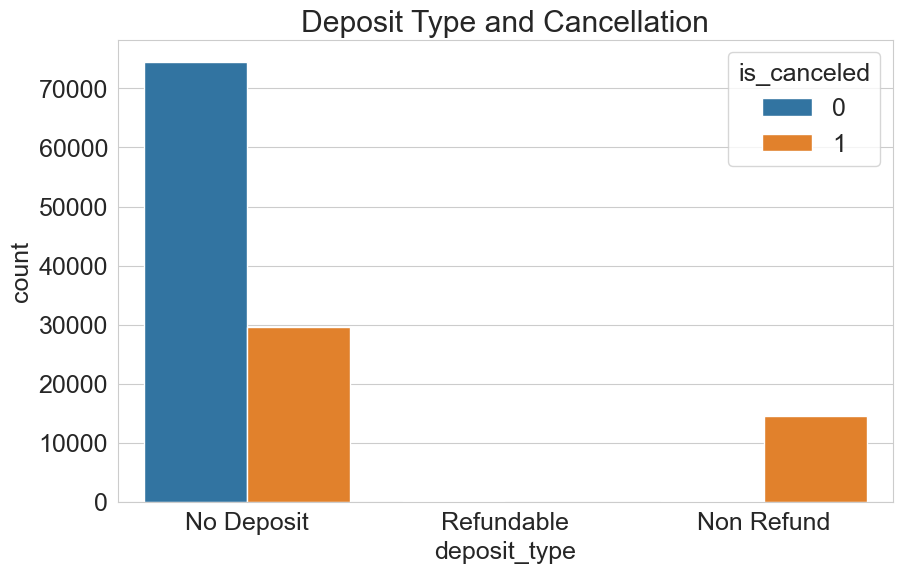

In [41]:
# 2. Deposit Type vs Cancellation
plt.figure(figsize=(10, 6))
sns.countplot(x='deposit_type', hue='is_canceled', data=hotel_data)
plt.title('Deposit Type and Cancellation')
plt.show()


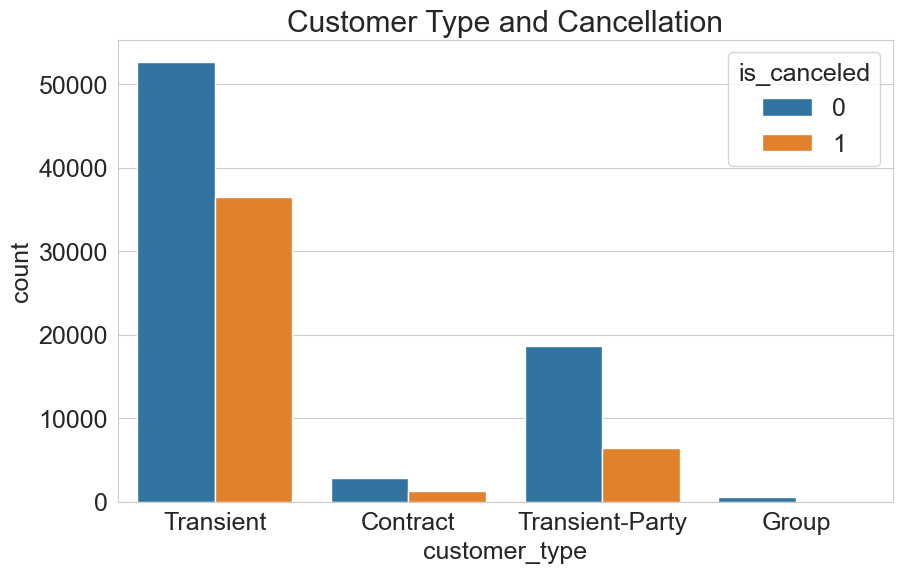

In [42]:

# 3. Customer Type vs Cancellation
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='is_canceled', data=hotel_data)
plt.title('Customer Type and Cancellation')
plt.show()

### **The visualizations provide insights into how different factors relate to booking cancellations:**

**Lead Time and Cancellation:** The boxplot shows a higher median lead time for canceled bookings compared to non-canceled bookings. This suggests that bookings made well in advance are more likely to be canceled.

**Deposit Type and Cancellation:** The count plot indicates a significant difference in cancellation rates based on the deposit type. Bookings with non-refundable deposits have a noticeably lower cancellation rate.

**Customer Type and Cancellation:** The cancellation rate varies among different customer types. It appears that certain types of customers, such as 'Transient' and 'Transient-Party', have higher cancellation rates compared to others like 'Group' or 'Contract'.

### The impact of customer demographics on booking patterns

This analysis will focus on understanding how factors like the country of origin, age group (inferred from the type of guests like adults, children, babies), and the duration of stay influence the booking behavior.

**We'll look into:**

**Country of Origin:** Understand the booking patterns of guests from different countries.

**Guest Composition:** Analyze how the composition of guests (adults, children, babies) affects booking choices.

**Duration of Stay:** Examine how the length of stay (weekend nights vs week nights) varies among different guest demographics.

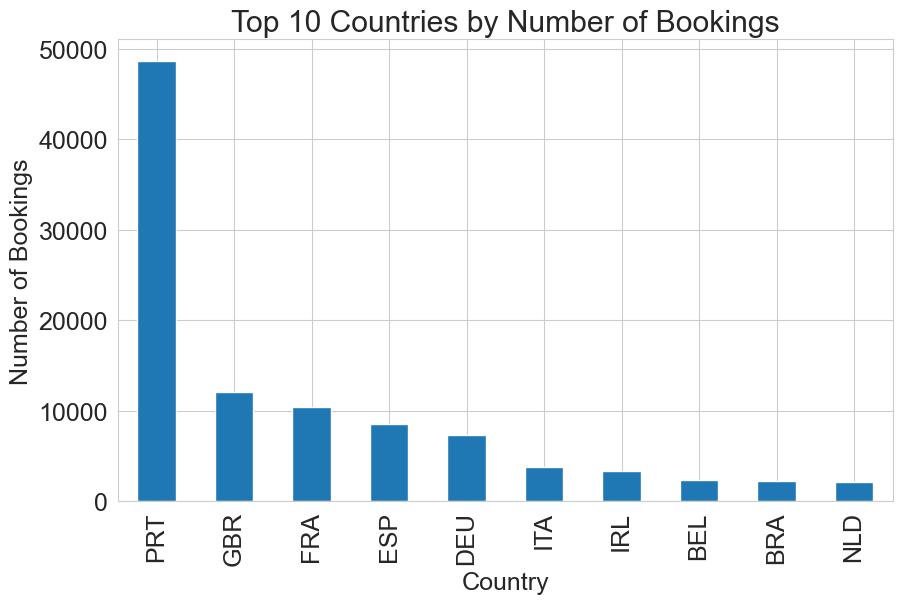

In [43]:
# 1. Country of Origin
# Displaying the top 10 countries in terms of number of bookings
top_countries = hotel_data['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.show()

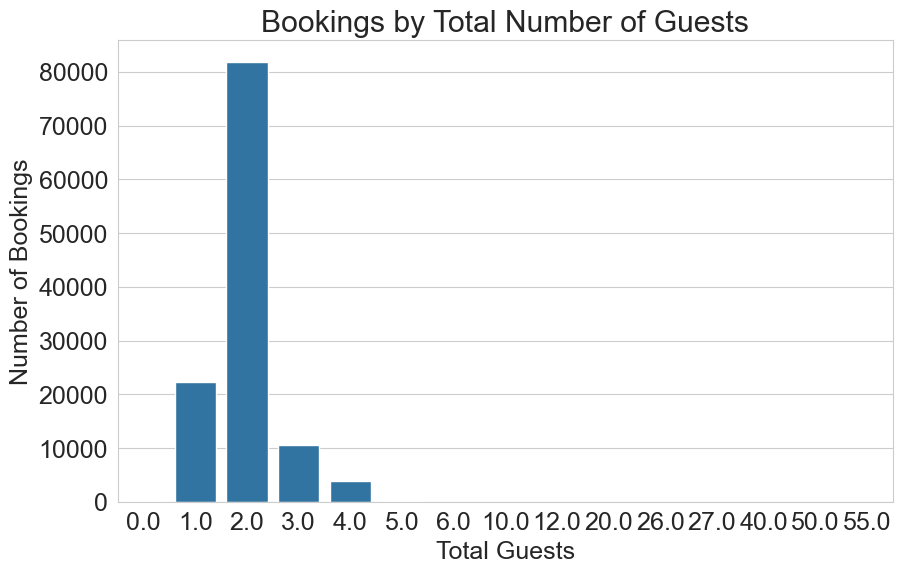

In [44]:
# 2. Guest Composition
# Combining adults, children, and babies into a total guests column
hotel_data['total_guests'] = hotel_data['adults'] + hotel_data['children'] + hotel_data['babies']

# Analyzing bookings by total number of guests
plt.figure(figsize=(10, 6))
sns.countplot(x='total_guests', data=hotel_data)
plt.title('Bookings by Total Number of Guests')
plt.xlabel('Total Guests')
plt.ylabel('Number of Bookings')
plt.show()

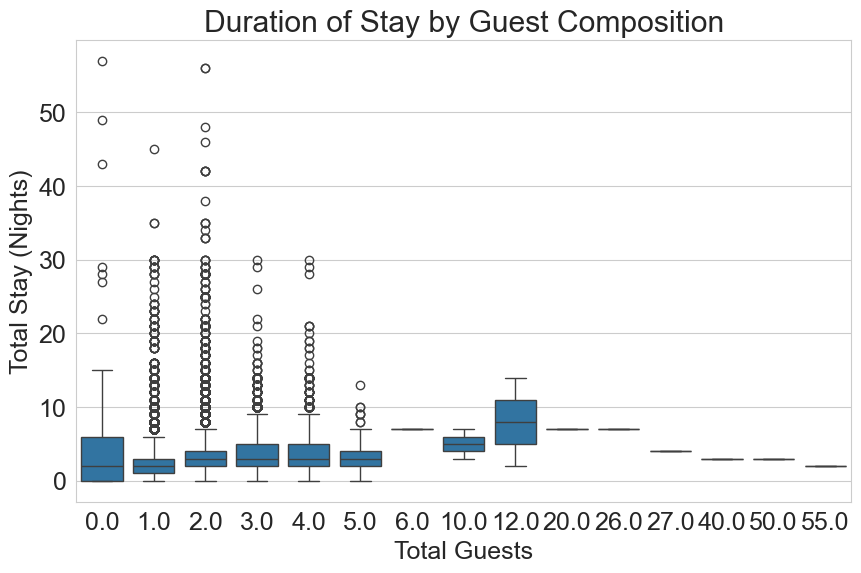

In [45]:
# 3. Duration of Stay
# Combining weekend and week nights into total stay nights
hotel_data['total_stay'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']

# Analyzing the duration of stay
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_guests', y='total_stay', data=hotel_data)
plt.title('Duration of Stay by Guest Composition')
plt.xlabel('Total Guests')
plt.ylabel('Total Stay (Nights)')
plt.show()

Country of Origin:

The bar chart shows the top 10 countries in terms of the number of bookings. This information can be valuable for targeted marketing campaigns and understanding the primary markets for the hotel.
Guest Composition:

The count plot illustrates the distribution of bookings based on the total number of guests. It's evident that the majority of bookings are made by solo travelers or couples. This insight can guide room allocation strategies and service offerings.
Duration of Stay:

The boxplot displaying the duration of stay against the total number of guests shows that as the number of guests increases, the variation in the length of stay also increases. This might suggest that larger groups tend to have less predictable stay durations, which could be important for capacity planning.

**Country of Origin:**

The bar chart shows the top 10 countries in terms of the number of bookings. This information can be valuable for targeted marketing campaigns and understanding the primary markets for the hotel.

**Guest Composition:**

The count plot illustrates the distribution of bookings based on the total number of guests. It's evident that the majority of bookings are made by solo travelers or couples. This insight can guide room allocation strategies and service offerings.

**Duration of Stay:**

The boxplot displaying the duration of stay against the total number of guests shows that as the number of guests increases, the variation in the length of stay also increases. This might suggest that larger groups tend to have less predictable stay durations, which could be important for capacity planning.


## Analyze the relationship between special requests and indicators of customer satisfaction.

**Repeat Guest Status:** Understanding if repeat guests tend to make more special requests.

**Reservation Status:** Analyzing if bookings with more special requests are less likely to be canceled.

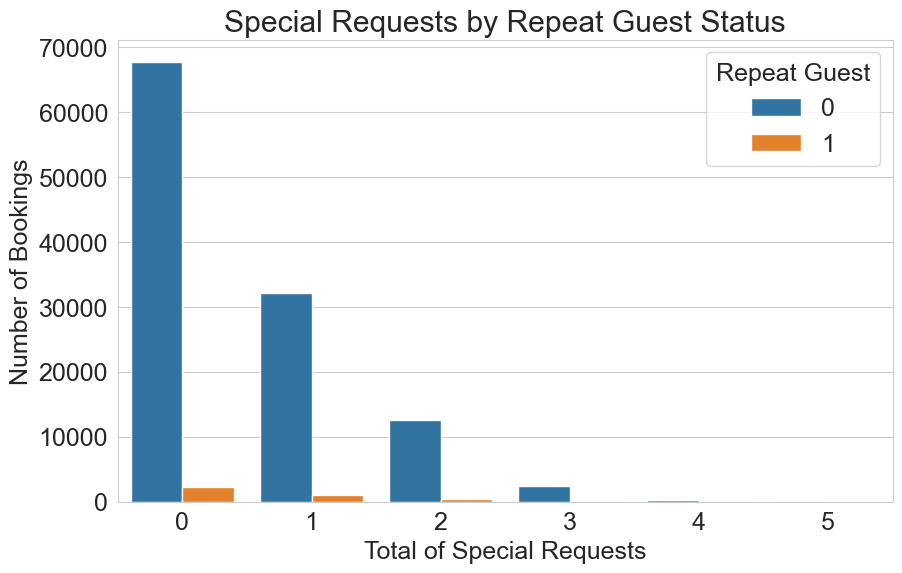

In [46]:
# 1. Special Requests and Repeat Guest Status
plt.figure(figsize=(10, 6))
sns.countplot(x='total_of_special_requests', hue='is_repeated_guest', data=hotel_data)
plt.title('Special Requests by Repeat Guest Status')
plt.xlabel('Total of Special Requests')
plt.ylabel('Number of Bookings')
plt.legend(title='Repeat Guest', loc='upper right')
plt.show()

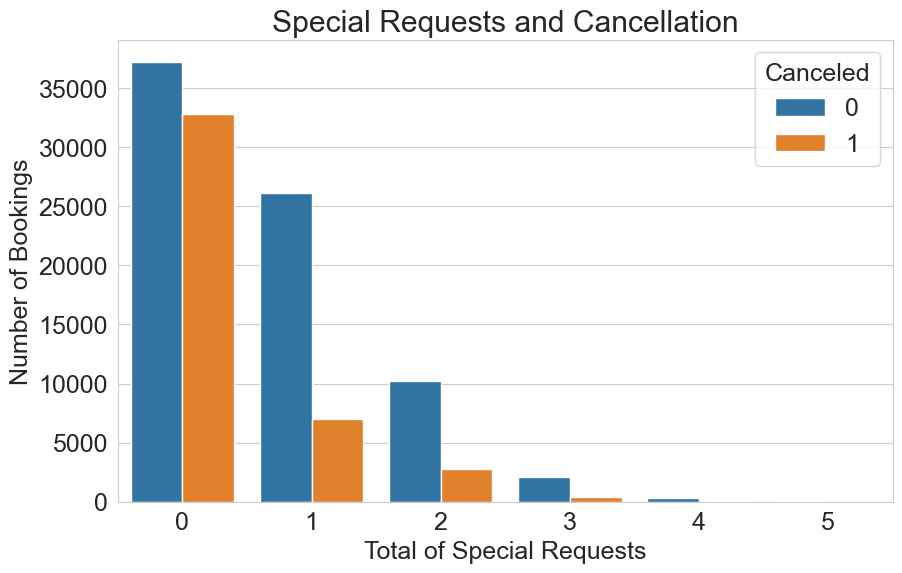

In [47]:
# 2. Special Requests and Reservation Status (Focusing on Cancellations)
# For simplicity, let's categorize reservation status into 'Canceled' and 'Not Canceled'
hotel_data['is_canceled'] = hotel_data['reservation_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

plt.figure(figsize=(10, 6))
sns.countplot(x='total_of_special_requests', hue='is_canceled', data=hotel_data)
plt.title('Special Requests and Cancellation')
plt.xlabel('Total of Special Requests')
plt.ylabel('Number of Bookings')
plt.legend(title='Canceled', loc='upper right')
plt.show()

**The analysis provides insights into the relationship between special requests and customer satisfaction:**

**Special Requests and Repeat Guest Status:**

The count plot reveals that repeat guests tend to make fewer special requests. This could suggest that repeat guests are either more familiar with the services and less inclined to make additional requests or are generally more satisfied and thus have fewer specific needs.

**Special Requests and Reservation Status (Cancellation):**

The second plot illustrates the relationship between the number of special requests and cancellations. It appears that bookings with a higher number of special requests are less likely to be canceled. This could indicate that when guests make more special requests, they are more committed to their stay, or these requests are a sign of higher engagement with the hotel.

## Cancellation Rate on Monthly Basis: Calculate and visualize the monthly cancellation rates.

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_4437/2405146248.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_name', y='is_canceled', data=monthly_cancellation_rate, palette='viridis')


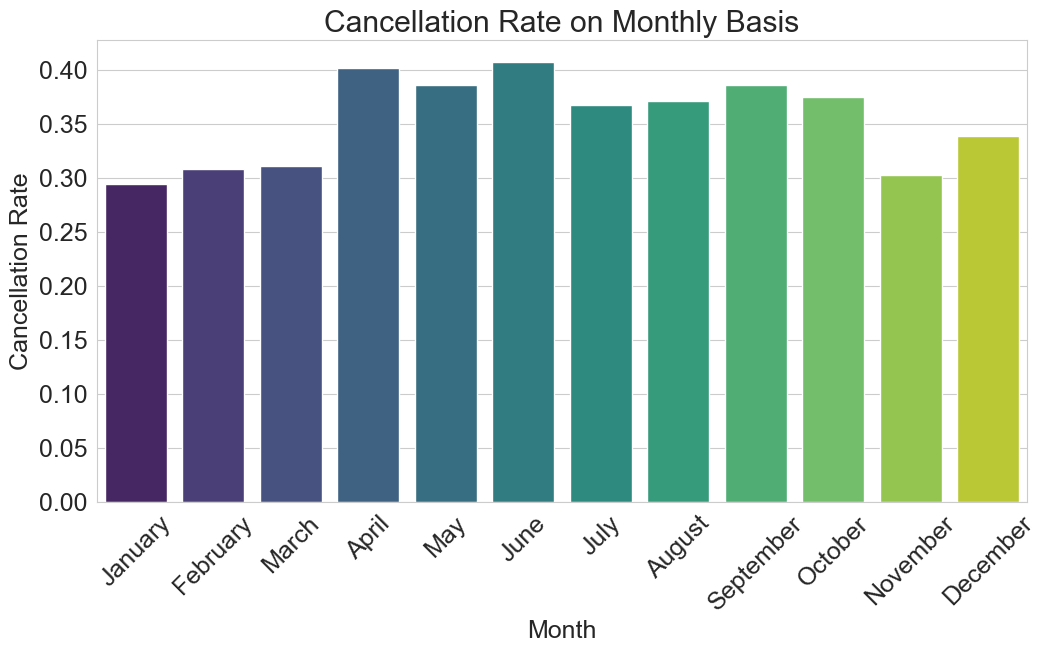

In [62]:
# Re-creating the 'month_numeric' column
hotel_data['month_numeric'] = hotel_data['arrival_date_month'].map(months_mapping)

# Grouping data by month and calculating the cancellation rate
monthly_cancellation_rate = hotel_data.groupby('month_numeric').agg({'is_canceled': 'mean'}).reset_index()

# Replacing numeric month with month names for plotting
monthly_cancellation_rate['month_name'] = monthly_cancellation_rate['month_numeric'].apply(lambda x: calendar.month_name[x])

# Plotting the cancellation rate by month
plt.figure(figsize=(12, 6))
sns.barplot(x='month_name', y='is_canceled', data=monthly_cancellation_rate, palette='viridis')
plt.title('Cancellation Rate on Monthly Basis')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

The bar chart illustrates the cancellation rate for each month, providing a clear view of how cancellation trends vary throughout the year. Some months show higher cancellation rates, which could be influenced by factors like seasonality, holidays, or specific events.

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_4437/1868466287.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_canceled', y='country', data=filtered_country_cancellation_rate.head(20), palette='mako')


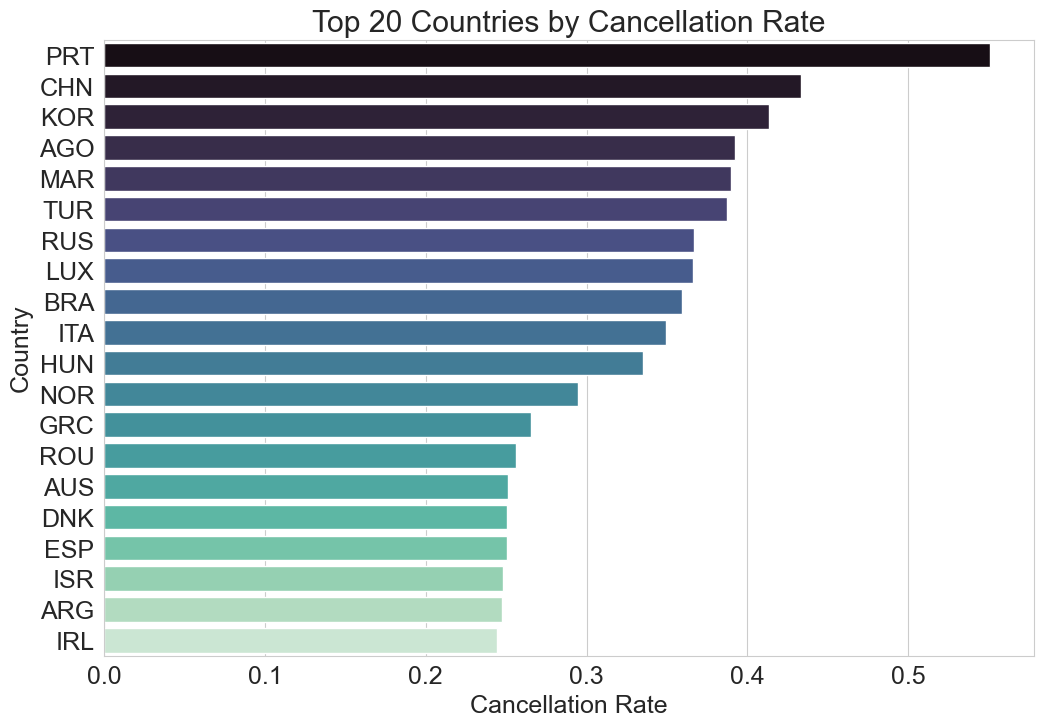

In [63]:
# Cancellation Rate on The Basis of Countries
# Grouping data by country and calculating the cancellation rate
country_cancellation_rate = hotel_data.groupby('country').agg({'is_canceled': 'mean'}).reset_index()

# Filtering out countries with very few bookings to avoid skewed results
# Let's consider only countries with more than 100 bookings for analysis
min_bookings_threshold = 100
country_booking_counts = hotel_data['country'].value_counts()
countries_to_consider = country_booking_counts[country_booking_counts > min_bookings_threshold].index
filtered_country_cancellation_rate = country_cancellation_rate[country_cancellation_rate['country'].isin(countries_to_consider)]

# Sorting countries by cancellation rate for better visualization
filtered_country_cancellation_rate = filtered_country_cancellation_rate.sort_values('is_canceled', ascending=False)

# Plotting the top 20 countries by cancellation rate
plt.figure(figsize=(12, 8))
sns.barplot(x='is_canceled', y='country', data=filtered_country_cancellation_rate.head(20), palette='mako')
plt.title('Top 20 Countries by Cancellation Rate')
plt.xlabel('Cancellation Rate')
plt.ylabel('Country')
plt.show()


The bar chart displays the top 20 countries with the highest cancellation rates, considering only countries with more than 100 bookings to ensure the data is not skewed by countries with very few bookings. This visualization reveals which countries have a higher propensity for cancellations, which can be valuable for understanding market behavior and planning strategies accordingly.

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_4437/1676457404.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Proportion', y='Market Segment', data=market_segment_ratio, palette='rocket')


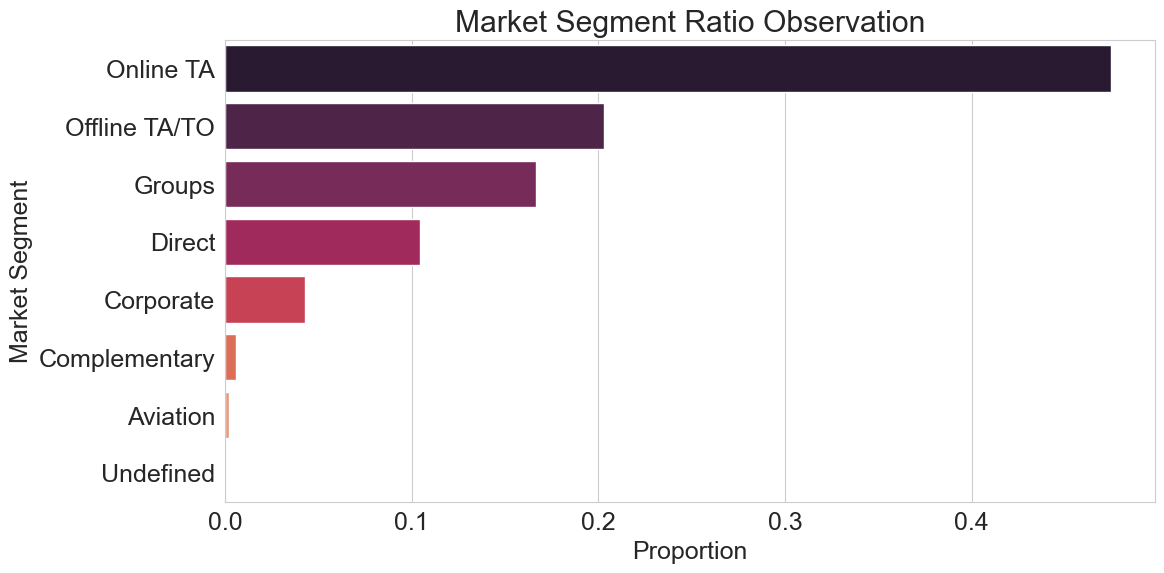

In [64]:
# Market Segment Ratio Observation
# Calculating the proportion of each market segment in the bookings
market_segment_ratio = hotel_data['market_segment'].value_counts(normalize=True).reset_index()
market_segment_ratio.columns = ['Market Segment', 'Proportion']

# Plotting the market segment ratios
plt.figure(figsize=(12, 6))
sns.barplot(x='Proportion', y='Market Segment', data=market_segment_ratio, palette='rocket')
plt.title('Market Segment Ratio Observation')
plt.xlabel('Proportion')
plt.ylabel('Market Segment')
plt.show()


The bar chart illustrates the distribution of different market segments among the hotel bookings. The proportions show how prevalent each market segment is, which can guide marketing strategies and resource allocation.

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_4437/2940045748.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Market Segment', y='Proportion', data=market_segment_comparison, palette='summer', ax=ax1)


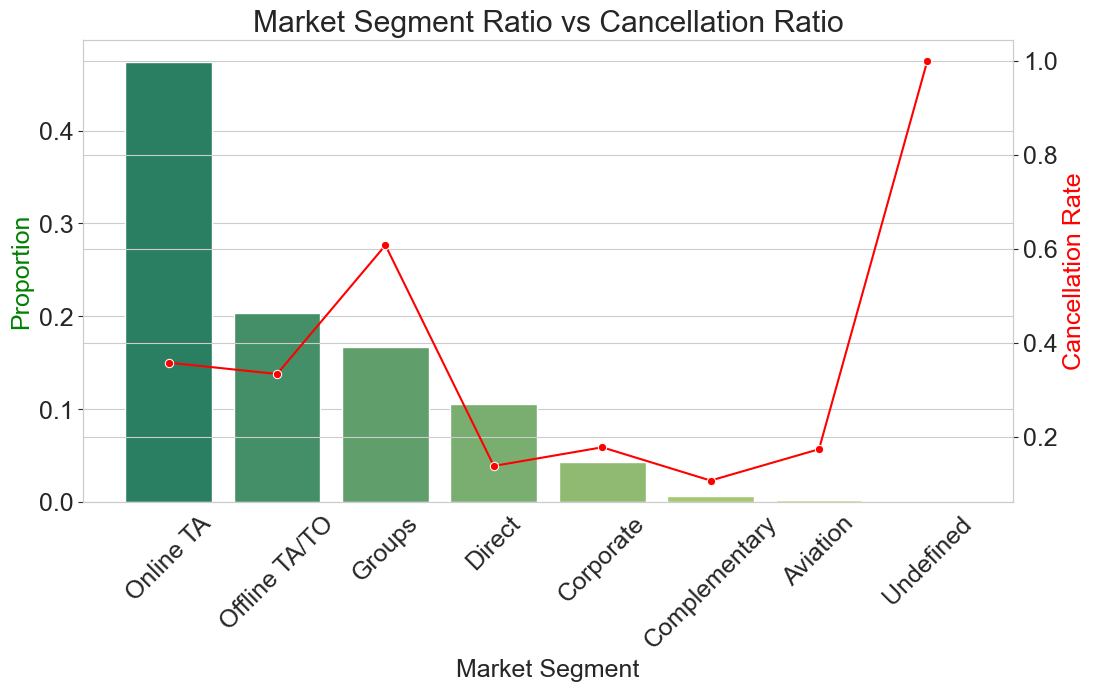

In [66]:
# Market Segment Ratio vs Cancellation Ratio
# Grouping data by market segment and calculating the cancellation rate
market_segment_cancellation_rate = hotel_data.groupby('market_segment').agg({'is_canceled': 'mean'}).reset_index()

# Merging market segment ratios with their cancellation rates for comparison
market_segment_comparison = market_segment_ratio.merge(market_segment_cancellation_rate, left_on='Market Segment', right_on='market_segment')
market_segment_comparison.drop('market_segment', axis=1, inplace=True)

# Plotting the market segment ratios vs cancellation ratio
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='Market Segment', y='Proportion', data=market_segment_comparison, palette='summer', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x='Market Segment', y='is_canceled', data=market_segment_comparison, color='red', marker='o', ax=ax2)

ax1.set_title('Market Segment Ratio vs Cancellation Ratio')
ax1.set_xlabel('Market Segment')
ax1.set_ylabel('Proportion', color='green')
ax2.set_ylabel('Cancellation Rate', color='red')
ax1.tick_params(axis='x', rotation=45)

plt.show()

The combined bar and line chart provides a comparative view of the market segment ratios and their respective cancellation rates. The bar plot (in green) shows the proportion of each market segment in the bookings, while the line plot (in red) illustrates the cancellation rate for each segment.

This visualization can help in identifying market segments that are both significant in volume and have high cancellation rates, potentially guiding strategies to manage and reduce cancellations in these segments.

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_4437/942537378.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_canceled', y='adr', data=cancellation_adr_comparison, palette='coolwarm')


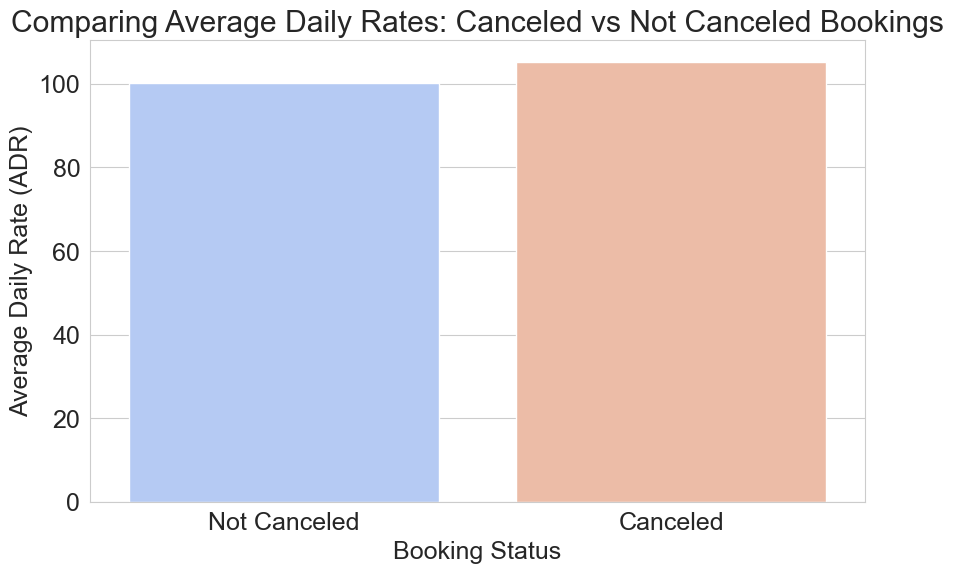

In [67]:
# Comparing Prices Trends of Cancellation and No-Cancellation
# Grouping data by cancellation status and calculating the average ADR
cancellation_adr_comparison = hotel_data.groupby('is_canceled').agg({'adr': 'mean'}).reset_index()

# Renaming 'is_canceled' for clarity in the plot
cancellation_adr_comparison['is_canceled'] = cancellation_adr_comparison['is_canceled'].map({0: 'Not Canceled', 1: 'Canceled'})

# Plotting the average ADR for canceled vs non-canceled bookings
plt.figure(figsize=(10, 6))
sns.barplot(x='is_canceled', y='adr', data=cancellation_adr_comparison, palette='coolwarm')
plt.title('Comparing Average Daily Rates: Canceled vs Not Canceled Bookings')
plt.xlabel('Booking Status')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


The bar chart compares the Average Daily Rates (ADR) for canceled versus not canceled bookings. This comparison shows whether there is a notable difference in pricing between bookings that were canceled and those that were not, which could indicate if pricing factors into cancellation decisions.

# Suggested Data-driven Decisions:

**Target Marketing Efforts:** Focus on the top countries identified in the booking patterns for targeted marketing campaigns.

**Customize Offers for Solo Travelers and Couples:** Since most bookings are made by solo travelers or couples, tailor your services and offers to cater to these demographics.

**Special Attention to Special Requests:** Encourage staff to pay close attention to special requests as they are linked to lower cancellation rates and potentially higher customer satisfaction.

**Strategies to Reduce Cancellations:** Consider strategies like encouraging shorter lead times for bookings and promoting non-refundable deposits.

**Seasonal and Regional Marketing Focus:** Target marketing efforts during months with higher cancellation rates and focus on countries with higher booking volumes or higher cancellation rates.

**Pricing Strategy Adjustment:** Consider revising pricing strategies for City hotels, as they tend to be more expensive. Analyze the impact of price differences on cancellations and adjust rates to balance occupancy and revenue.

**Special Attention to Market Segments with High Cancellations:** Develop tailored strategies for market segments that have high booking proportions but also high cancellation rates. This could involve flexible pricing, personalized offers, or stricter cancellation policies.

**Enhancing Guest Experience for Repeat Customers:** Since repeat guests tend to make fewer special requests, ensure their experiences are personalized based on past preferences to encourage loyalty.

**Monitoring and Adjusting Rates Based on Booking Status:** Since there is a difference in ADR between canceled and non-canceled bookings, monitor booking trends and adjust rates or offer promotions to reduce the likelihood of cancellations.

**Operational Planning Based on Seasonal Trends:** Prepare for higher or lower demand in certain months based on historical cancellation rates and adjust staffing and resources accordingly.

## Message:

This analysis aimed to uncover insights from the hotel booking dataset to inform better business decisions. The findings should help in understanding customer behavior, optimizing marketing strategies, and enhancing guest satisfaction. As with any analysis, the insights are as good as the data available, and further investigation, especially into the causality of observed trends, is recommended.

[Hafida Belayd](https://www.linkedin.com/in/hafida-belayd/)
